In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import os
path = os.getcwd() + '\data\Chennai_house_multivariate_train.csv'
raw_data = pd.read_csv(path)
raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [56]:
raw_data.describe()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5.999000e+03
mean,3.891982,1381.589765,99.500417,1.633939,1.214536,0.837473,0.507585,1.998666,2.249542,1.083514,4.307885,3.528455,3.503901,3.480430,377307.705951,140825.542924,1.089336e+07
std,1.821109,456.227575,57.513342,0.800564,0.410534,0.706344,0.499984,0.811922,0.851556,0.798377,1.504042,0.890389,0.896091,0.885469,142078.257698,78323.210519,3.749131e+06
min,1.000000,500.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,3.000000,993.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,2.800000,2.700000,2.700000,273609.000000,84137.500000,8.287400e+06
50%,4.000000,1374.000000,99.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,5.000000,3.500000,3.500000,3.500000,351406.000000,127751.000000,1.036659e+07
75%,5.000000,1744.000000,148.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,6.000000,4.300000,4.300000,4.200000,452059.000000,185005.500000,1.296593e+07
max,7.000000,2499.000000,200.000000,4.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,6.000000,5.000000,5.000000,5.000000,983922.000000,495405.000000,2.366734e+07


In [57]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [58]:
data.min()

AreaCode        -0.481997
INT_SQFT        -0.441015
DIST_MAINROAD   -0.497502
N_BEDROOM       -0.211313
N_BATHROOM      -0.214536
OTHER_ROOMS     -0.418736
PARK_FACILITY   -0.507585
BUILDINGTYPE    -0.499333
UTILITY_AVAIL   -0.624771
STREET          -0.541757
MZZONE          -0.661577
QS_ROOMS        -0.509485
QS_BATHROOM     -0.501300
QS_BEDROOM      -0.493477
REG_FEE         -0.335396
COMMIS          -0.276885
SALES_PRICE     -0.406151
dtype: float64

In [59]:
data.max()

AreaCode         0.518003
INT_SQFT         0.558985
DIST_MAINROAD    0.502498
N_BEDROOM        0.788687
N_BATHROOM       0.785464
OTHER_ROOMS      0.581264
PARK_FACILITY    0.492415
BUILDINGTYPE     0.500667
UTILITY_AVAIL    0.375229
STREET           0.458243
MZZONE           0.338423
QS_ROOMS         0.490515
QS_BATHROOM      0.498700
QS_BEDROOM       0.506523
REG_FEE          0.664604
COMMIS           0.723115
SALES_PRICE      0.593849
dtype: float64

In [60]:
data.shape

(5999, 17)

In [61]:
cols = data.shape[1]
print (cols)

17


In [62]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [63]:
cols = data.shape[1]
print (cols)

18


In [64]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [71]:
x = np.matrix(x)
y = np.matrix(y)
params = x.shape[1]
theta = np.matrix(np.array(np.zeros(params)))

In [72]:
x.shape, theta.shape, y.shape

((5999, 17), (1, 17), (5999, 1))

In [73]:
def computeError(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    
    return np.sum(inner) / (2 * len(x))

In [74]:
computeError(x, y, theta)

0.015186556392354323

In [75]:
Learn_rate= 1
iters = 150
def gradientDescent(x, y, theta, Learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate/ len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeError(x, y, theta)
        
    return theta, cost

In [76]:
new_theta, cost = gradientDescent(x, y, theta, Learn_rate, iters)
print(new_theta, cost)

[[ 1.61749445e-17 -6.39818746e-02  1.38075852e-01  3.09724881e-03
   7.01090414e-02  2.17123709e-02  1.56359887e-01  2.87829557e-02
  -1.12844191e-01 -6.94872196e-03  9.33655962e-03  1.04579552e-01
   5.41168649e-03  1.21871297e-03  3.72848228e-03  4.05504694e-01
   1.05573436e-01]] [0.01141782 0.00884014 0.00705888 0.00581573 0.00493954 0.00431571
 0.00386679 0.00354003 0.00329924 0.00311941 0.00298317 0.00287836
 0.00279642 0.0027313  0.00267866 0.00263539 0.00259925 0.00256859
 0.00254219 0.00251916 0.00249882 0.00248065 0.00246425 0.00244933
 0.00243564 0.00242299 0.00241122 0.00240023 0.00238989 0.00238014
 0.00237089 0.0023621  0.00235371 0.00234568 0.00233797 0.00233056
 0.00232342 0.00231652 0.00230984 0.00230337 0.00229709 0.00229099
 0.00228505 0.00227927 0.00227363 0.00226812 0.00226274 0.00225749
 0.00225234 0.00224731 0.00224238 0.00223755 0.00223282 0.00222817
 0.00222362 0.00221914 0.00221475 0.00221044 0.0022062  0.00220204
 0.00219795 0.00219392 0.00218997 0.00218608 0

In [77]:
computeError(x, y, new_theta)

0.001997794984267301

In [78]:
Model_price =  x*new_theta.T 

Text(0.5, 1.0, 'Error vs. Iterations')

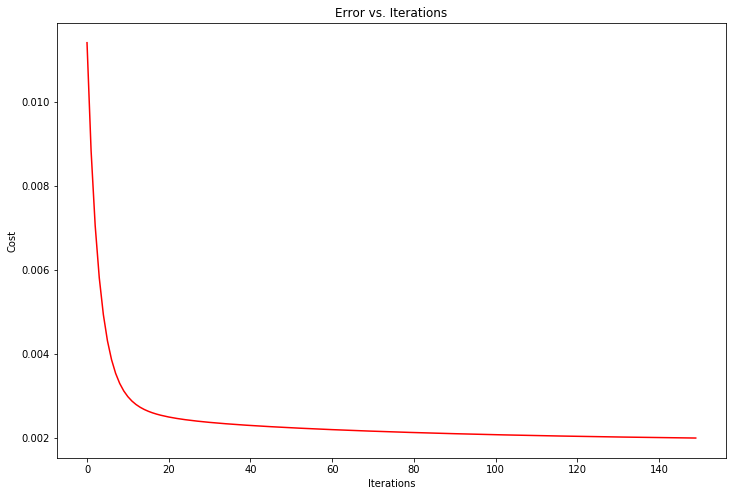

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [84]:
import math
erro_r = [np.power((b-a),2) for (a, b) in zip(Model_price, y)] #mean absolute percentage error
error0 = np.sum(erro_r)

error=(error0/len(y))*100

print("training error % = {}".format(error))
accuracy= 100 - error
print("training accuracy %={}".format(accuracy))

training error % = 0.39955899685346025
training accuracy %=99.60044100314654


In [85]:
import os
t_path = os.getcwd() + '\data\Chennai_house_multivariate_test.csv'
t_raw_data = pd.read_csv(t_path)
t_raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,5,2497,197,4,2,0,1,3,1,1,5,2.0,2.4,4.7,445401,301723,14367780
1,4,1265,55,1,1,1,0,2,3,0,5,3.8,3.0,3.3,242471,103916,6927750
2,2,1769,28,1,1,2,1,3,2,1,6,3.8,3.7,2.1,418558,294541,15502160
3,6,1902,21,2,1,2,1,3,3,0,4,4.5,2.2,3.6,427193,124024,13780420
4,5,1895,63,3,2,0,0,1,3,1,6,3.5,3.1,4.8,551971,340923,16234440


In [97]:
t_data=(t_raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())

In [98]:
t_data.insert(0, 'Ones', 1)
t_data.head()
t_cols = t_data.shape[1]
print (t_cols)

18


In [99]:
t_x=t_data.iloc[:,0:t_cols-1]
t_y=t_data.iloc[:,t_cols-1:t_cols]
t_x.shape

(1104, 17)

In [100]:
t_x = np.matrix(t_x)
t_y = np.matrix(t_y)

In [103]:
Model_testdata_price =  t_x*new_theta.T 

In [106]:
test_error = [np.power((b-a),2) for (a, b) in zip(Model_testdata_price, t_y)] #mean absolute percentage error
error = np.sum(test_error)

error=(error/len(y))*100

print("test error % = {}".format(error))
accuracy= 100 - error
print("test accuracy %={}".format(accuracy))

test error % = 0.06957430199861855
test accuracy %=99.93042569800139
